In [6]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [7]:
unitTime_in_Myrs = 0.0306585 # Myrs
UnitDensity_in_cgs = 1.6e-17
UnitRadius_in_cm =  4.99e+16
unitVelocity =  51575.68

In [317]:
jj = 1582   # 1219 =====> 1e-13

nam = 'snap_' + str(jj).zfill(3) + '.hdf5'

file = h5py.File('/mnt/Linux_Shared_Folder_2022/GPU_sph/180k_Gad_Arreaga/' + nam, 'r')

## Getting the proper time of the snapshot

In [318]:
df_info = pd.read_csv('/mnt/Linux_Shared_Folder_2022/GPU_sph/180k_Gad_Arreaga/infox.csv')
x7 = df_info['x7'].values
n7 = np.where(x7 == 180000)[0]

t_arr = df_info['x3'].values

t = t_arr[n7][jj]
print('Current time in code unit = ', t)
print()
print(f'Current time in kyrs = {t*unitTime_in_Myrs*1000:.3f}')
print()
print(f'Number of Snapshots = ', len(n7))


#df_info.head()

Current time in code unit =  1.54492

Current time in kyrs = 47.365

Number of Snapshots =  1675


In [319]:
file.keys()

<KeysViewHDF5 ['Config', 'Header', 'Parameters', 'PartType0']>

In [320]:
file['Parameters']

<HDF5 group "/Parameters" (0 members)>

In [321]:
file['PartType0'].keys()

<KeysViewHDF5 ['Coordinates', 'Density', 'InternalEnergy', 'Masses', 'ParticleIDs', 'SmoothingLength', 'Velocities']>

In [322]:
coord = file['PartType0']['Coordinates']
coord

<HDF5 dataset "Coordinates": shape (180000, 3), type "<f4">

In [323]:
vel = file['PartType0']['Velocities']
np.sort((vel[:, 0]))

array([-3.9344046, -3.8868277, -3.879639 , ...,  3.913325 ,  3.966579 ,
        4.0422206], dtype=float32)

(-0.2, 0.2)

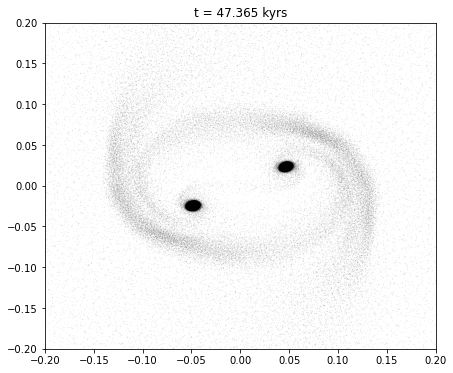

In [324]:
plt.figure(figsize = (7, 6))
plt.scatter(coord[:, 0], coord[:, 1], s = 0.0002, color = 'black')

plt.title(f't = {round(t*unitTime_in_Myrs*1000, 3)} kyrs')

#plt.axvline(x = -0.0202, linestyle = '--')
#plt.axvline(x =  0.0254, linestyle = '--')

xyrange = 0.2

plt.xlim(-xyrange, xyrange)
plt.ylim(-xyrange, xyrange)

In [293]:
h = np.array(file['PartType0']['SmoothingLength'])

np.min(h), np.max(h), np.median(h)

(0.0005645442, 1.2336226, 0.027978744)